In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("petrol_consumption.csv")

In [ ]:
print(data)

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577                         0.529   
9         7.00            4512            8507                         0.552   
10        8.00            4391            5939                         0.530   
11        7.50            5126          

In [ ]:
data.shape

(48, 5)

In [ ]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


CLEANING THE DATA

In [ ]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


TO FIND OUTLIER

In [ ]:
iqr=data['Petrol_tax'].quantile(0.75)-data['Petrol_tax'].quantile(0.25)
upper_thereshold=data['Petrol_tax'].quantile(0.75)+(1.5*iqr)
iqr
upper_thereshold

9.8125

In [ ]:
lower_thereshold=data['Petrol_tax'].quantile(0.25)-(1.5*iqr)
lower_thereshold

5.3125

outliers are close to each other so no need to treat a outlier in above petrol_tax column

In [ ]:
iqr=data['Average_income'].quantile(0.75)-data['Average_income'].quantile(0.25)
upper_thereshold=data['Average_income'].quantile(0.75)+(1.5*iqr)
lower_thereshold=data['Average_income'].quantile(0.25)-(1.5*iqr)

upper_thereshold,lower_thereshold

(5838.375, 2479.375)

no outlier in averge_income column

In [ ]:
iqr=data['Paved_Highways'].quantile(0.75)-data['Paved_Highways'].quantile(0.25)
upper_thereshold=data['Paved_Highways'].quantile(0.75)+(1.5*iqr)
lower_thereshold=data['Paved_Highways'].quantile(0.25)-(1.5*iqr)

upper_thereshold,lower_thereshold

(13224.625, -2958.375)

here we have outlier in upper_threshold so make any vale>upper_threshold make it as upeerthreshold by using clipping


In [ ]:
data.Paved_Highways=data.Paved_Highways.clip(-2958, 13224)

In [ ]:
iqr=data['Population_Driver_licence(%)'].quantile(0.75)-data['Population_Driver_licence(%)'].quantile(0.25)
upper_thereshold=data['Population_Driver_licence(%)'].quantile(0.75)+(1.5*iqr)
lower_thereshold=data['Population_Driver_licence(%)'].quantile(0.25)-(1.5*iqr)
lower_thereshold,upper_thereshold

(0.4315000000000002, 0.6934999999999998)

In [ ]:
data.shape

(48, 5)

data is clean now 

next EDA

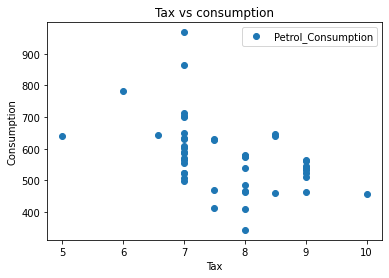

In [ ]:
import matplotlib.pyplot as plt
data.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

here we have visual difficulties

Text(0.5, 1.0, 'tax vs consumption')

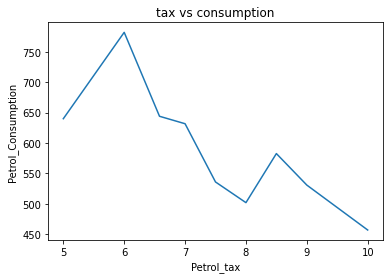

In [ ]:
import matplotlib.pyplot as plt
data.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.title('tax vs consumption')


In [ ]:
data[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) There is a linear relationship between tax and consumption 2) As tax increases, comsumption decreases which is in-line with our GK 3) No transformation required - we can consider the feature for linear regression

Text(0.5, 1.0, 'Average_income vs Petrol_Consumption')

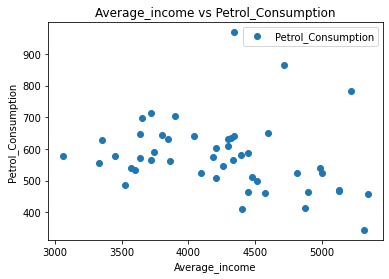

In [ ]:
data.plot(x='Average_income',y='Petrol_Consumption',style='o')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.title('Average_income vs Petrol_Consumption')

In [ ]:
data[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


Text(0.5, 1.0, 'Paved_Highways  vs Petrol_Consumption')

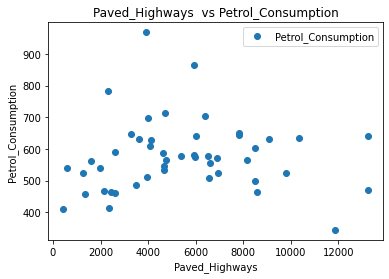

In [ ]:
data.plot(x='Paved_Highways',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('Paved_Highways  vs Petrol_Consumption')

In [ ]:
data[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009854
Petrol_Consumption,0.009854,1.000000


there is no linear relationship netween the feature and target so we need to tranform and check if it gives the linear relationship

In [ ]:
import numpy as np

used square payed_highways


Text(0.5, 1.0, 'transformed  vs Petrol_Consumption')

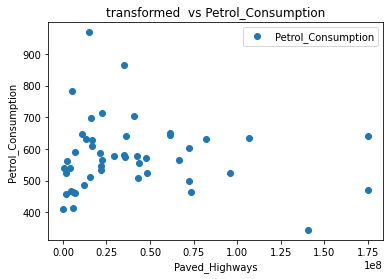

In [ ]:
data['transformed']=np.square(data['Paved_Highways'])#trasform
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('transformed  vs Petrol_Consumption')

In [ ]:
# used cube

Text(0.5, 1.0, 'transformed  vs Petrol_Consumption')

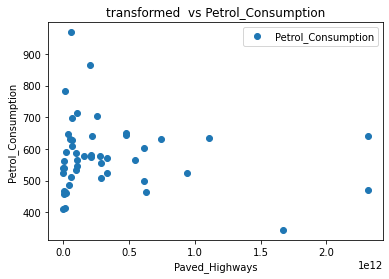

In [ ]:
data['transformed']=np.power(data['Paved_Highways'],3)#trasform
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('transformed  vs Petrol_Consumption')

In [ ]:
data[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.00000,-0.13457
Petrol_Consumption,-0.13457,1.00000


used log

Text(0.5, 1.0, 'transformed  vs Petrol_Consumption')

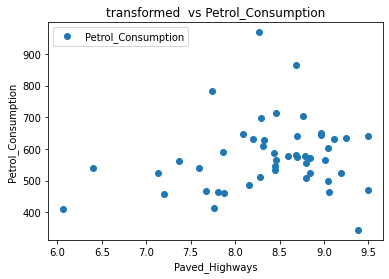

In [ ]:
data['transformed']=np.log(data['Paved_Highways'])#trasform
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('transformed  vs Petrol_Consumption')

In [ ]:
data[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.165335
Petrol_Consumption,0.165335,1.000000


used square root

Text(0.5, 1.0, 'transformed  vs Petrol_Consumption')

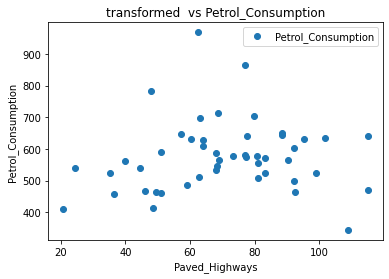

In [ ]:
data['transformed']=np.power(data['Paved_Highways'],0.5)#trasform
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('transformed  vs Petrol_Consumption')

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


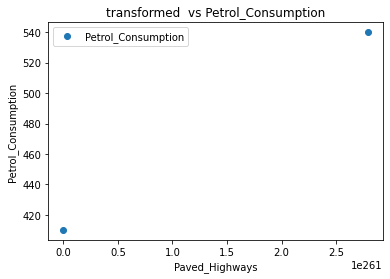

In [ ]:
data['transformed']=np.exp(data['Paved_Highways'])#trasform
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('transformed  vs Petrol_Consumption')
data[['transformed','Petrol_Consumption']].corr()

nothing works and form the linear regression so we can drop this feature 


,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


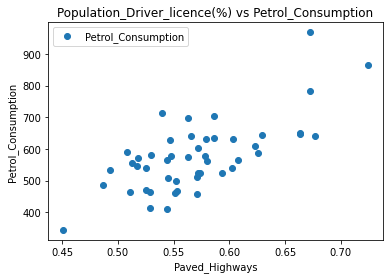

In [ ]:

data.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
data[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

here it gives linear relationship so we are considering this feature

1) High correlation between the data 2) No transformation req

eda is completed
next step is splitting the data

In [ ]:
X=data[['Petrol_tax','Average_income','Population_Driver_licence(%)']]
y=data['Petrol_Consumption']

Petrol_tax	Average_income	Paved_Highways	Population_Driver_licence(%)	Petrol_Consumption

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)


LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['Petrol_tax','Average_income','Population_Driver_licence(%)'],columns=['coefficient'])
y_pred=regressor.predict(X_test_scaled)
coeff_df

,coefficient
Petrol_tax,-31.883123
Average_income,-35.681131
Population_Driver_licence(%),68.527733


In [ ]:
regressor.predict(scaler.transform(np.array([[11,5000,0.6]])))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([455.14178133])

In [ ]:
regressor.intercept_ #c

576.8421052631579

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
43,591,545.691520
25,566,528.242111
11,471,464.930103
29,534,469.889437
7,467,484.727272
15,635,610.583091
13,508,564.580645
18,865,763.895462
16,603,599.508278
12,525,563.884892


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8042185609781168


Feature Selection

RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', True)]

Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', False), ('Average_income', True), ('LogPaved_Highways', True)]


In [ ]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SequentialFeatureSelector was fitted without feature names
  warnings.warn(


array([[3.571e+03, 5.250e-01],
       [4.092e+03, 5.720e-01],
       [3.865e+03, 5.800e-01],
       [4.870e+03, 5.290e-01],
       [4.399e+03, 5.440e-01],
       [5.342e+03, 5.710e-01],
       [5.319e+03, 4.510e-01],
       [5.126e+03, 5.530e-01],
       [4.447e+03, 5.290e-01],
       [4.512e+03, 5.520e-01],
       [4.391e+03, 5.300e-01],
       [5.126e+03, 5.250e-01],
       [4.817e+03, 5.740e-01],
       [4.207e+03, 5.450e-01],
       [4.332e+03, 6.080e-01],
       [4.318e+03, 5.860e-01],
       [4.206e+03, 5.720e-01],
       [3.718e+03, 5.400e-01],
       [4.716e+03, 7.240e-01],
       [4.341e+03, 6.770e-01],
       [4.593e+03, 6.630e-01],
       [4.983e+03, 6.020e-01],
       [4.897e+03, 5.110e-01],
       [4.258e+03, 5.170e-01],
       [4.574e+03, 5.510e-01],
       [3.721e+03, 5.440e-01],
       [3.448e+03, 5.480e-01],
       [3.846e+03, 5.790e-01],
       [4.188e+03, 5.630e-01],
       [3.601e+03, 4.930e-01],
       [3.640e+03, 5.180e-01],
       [3.333e+03, 5.130e-01],
       [

Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

-0.08393233997817832